In [15]:
#Preparing all libraries
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import golden
from scipy.optimize import fminbound
from scipy.optimize import minimize
from scipy.linalg import svd
from scipy.stats import trim_mean
import scipy.io
import statistics
import math
import time
from tqdm import trange
from matplotlib import cm
import os
import functools
import csv

In [16]:
run_number_list = [78,79,80,81,82,83,86] #Options: 78,79,80,81,82,83,86

flip_angles = [90, 45, 22.5, 11.3, 5.7, 2.8, 1.4]

cwd = os.getcwd()

In [17]:
early_subset = True
imag_opt = False

In [18]:
#Phased is a matrix of 64 TI trials. Each TI trial has 100 noise realizations with 2048 echos

init_sig_list = np.zeros(len(run_number_list))
final_std_list = np.zeros(len(run_number_list))
SNR_list = np.zeros(len(run_number_list))

for i_run in range(len(run_number_list)):

    run_number = run_number_list[i_run]

    file_oi = f"real_phased_run{run_number}" #imag_unphased_dataset    real_unphased_dataset   real_phased_dataset

    raw = scipy.io.loadmat(f'{cwd}/{file_oi}.mat')
    raw_complex = raw['real_phased_dataset']

    with open(f'{cwd}\\dualGel_TI.txt') as f:
        TI = f.readlines()
    TI_DATA = [int(sub.replace("\n", "")) for sub in TI]

    assert(TI_DATA[0] < TI_DATA[-1])
    TE_DATA = np.arange(1,2048.1,1)*0.4 #ms

    sp = 2
    ext = 256
    if early_subset:
        raw_complex = raw_complex[sp-1::sp,:,:]
        TE_DATA = TE_DATA[sp-1::sp]
        raw_complex = raw_complex[:ext,:,:]
        TE_DATA = TE_DATA[:ext]

    raw_real = np.real(raw_complex)
    raw_imag = np.imag(raw_complex)

    if imag_opt:
        raw_data = raw_imag
    else:
        raw_data = raw_real

    noise_realizations = raw_data.shape[-1]
    assert(len(TI_DATA) == raw_data.shape[1])
    # print(f"Raw Data has shape {raw_data.shape}")
    # print(f"TE values = [{TE_DATA[0]}, {TE_DATA[1]}, {TE_DATA[2]}, ..., {TE_DATA[-1]}]")
    # print(f"TI values = [{TI_DATA[0]}, {TI_DATA[1]}, {TI_DATA[2]}, ..., {TI_DATA[-1]}]")


    init_sig_list[i_run] = np.mean(raw_data[0,-1,:])
    final_std_list[i_run] = np.std(raw_data[0,-1,:])
    SNR_list[i_run] = np.mean(raw_data[0,-1,:])/np.std(raw_data[0,-1,:])

Text(0.5, 0, 'Flip Angles')

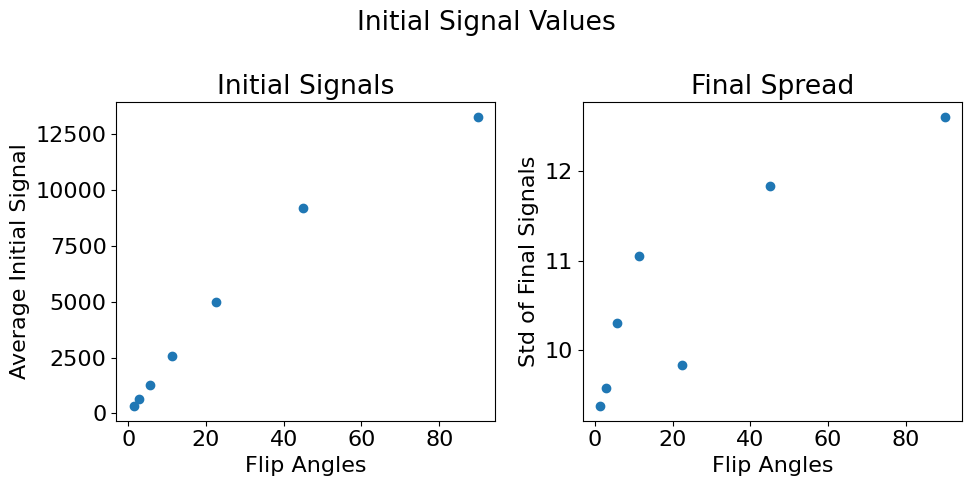

In [19]:
plt.rc('font', size = 16)
fig, ax = plt.subplots(1,2, figsize = (10, 5), tight_layout=True)

fig.suptitle(f"Initial Signal Values")

ax[0].set_title("Initial Signals")
ax[0].plot(flip_angles, init_sig_list, marker = 'o', ls = '')

ax[0].set_ylabel("Average Initial Signal")
ax[0].set_xlabel("Flip Angles")


ax[1].set_title("Final Spread")
ax[1].plot(flip_angles, final_std_list, marker = 'o', ls = '')

ax[1].set_ylabel("Std of Final Signals")
ax[1].set_xlabel("Flip Angles")


Minimum SNR = 34.55854790490852
Maximum SNR = 1051.156197896791


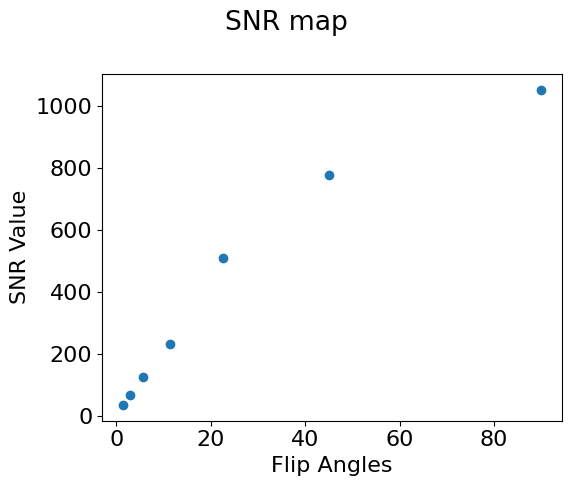

In [20]:
plt.rc('font', size = 16)
fig, ax = plt.subplots(1,1, figsize = (6, 5), tight_layout=True)

fig.suptitle(f"SNR map")

ax .plot(flip_angles, SNR_list, marker = 'o', ls = '')
ax.set_ylabel("SNR Value")
ax.set_xlabel("Flip Angles")

print(f"Minimum SNR = {np.min(SNR_list)}")
print(f"Maximum SNR = {np.max(SNR_list)}")


In [21]:
for i_run in range(len(run_number_list)):
    print(f"Run : {run_number_list[i_run]} :: SNR : {SNR_list[i_run]}")

Run : 78 :: SNR : 1051.156197896791
Run : 79 :: SNR : 775.2138784150495
Run : 80 :: SNR : 508.3854321598154
Run : 81 :: SNR : 232.36491832560324
Run : 82 :: SNR : 125.56976514610722
Run : 83 :: SNR : 67.78890984980715
Run : 86 :: SNR : 34.55854790490852
